In [373]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()        

In [374]:
print(breast_cancer.DESCR)  #for show datasets

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Dataset Info

In [375]:
breast_cancer.target[500] #check sample - 0 = - and 1 = +

np.int64(1)

In [376]:
breast_cancer.target.shape #show  Instances

(569,)

In [377]:
breast_cancer.data[500]  #show data people

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

In [378]:
breast_cancer.data.shape # Instances & Feature 

(569, 30)

# Preprocessing

In [379]:
from sklearn.model_selection import train_test_split
                                                  #Split dataset into 80% training and 20% testing sets
Feature_train,Feature_test,Label_train,Label_test = train_test_split(breast_cancer.data,breast_cancer.target,test_size=0.2)
print(f"Feature : train {Feature_train.shape} | test {Feature_test.shape}")
print(f"Label   : train {Label_train.shape}    | test {Label_test.shape}")

Feature : train (455, 30) | test (114, 30)
Label   : train (455,)    | test (114,)


In [380]:
Feature_train[0]

array([1.218e+01, 2.052e+01, 7.722e+01, 4.587e+02, 8.013e-02, 4.038e-02,
       2.383e-02, 1.770e-02, 1.739e-01, 5.677e-02, 1.924e-01, 1.571e+00,
       1.183e+00, 1.468e+01, 5.080e-03, 6.098e-03, 1.069e-02, 6.797e-03,
       1.447e-02, 1.532e-03, 1.334e+01, 3.284e+01, 8.458e+01, 5.478e+02,
       1.123e-01, 8.862e-02, 1.145e-01, 7.431e-02, 2.694e-01, 6.878e-02])

In [381]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) # Normalizes data to [0, 1] range
Feature_train = scaler.fit_transform(Feature_train)
Feature_test = scaler.transform(Feature_test)

In [382]:
Feature_train[0]
# Normalizes data OK!

array([0.24605992, 0.36557322, 0.23101375, 0.13370095, 0.15982242,
       0.05261523, 0.05583411, 0.08797217, 0.34292929, 0.14342881,
       0.02929567, 0.26759194, 0.01940722, 0.01471429, 0.11445763,
       0.02331027, 0.02699495, 0.12875545, 0.09269995, 0.02201401,
       0.1924582 , 0.55490405, 0.1701778 , 0.08911718, 0.27161065,
       0.05950267, 0.09786325, 0.25536082, 0.22255076, 0.090122  ])

# Classification    


In [383]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test):
    """
    Calculate and print evaluation metrics for classification model
    
    Args:
        Label_train: Actual labels of training set
        Label_test: Actual labels of test set
        Label_pred_train: Predicted labels for training set
        Label_pred_test: Predicted labels for test set
    
    Returns:
        Tuple of (train_accuracy, test_accuracy, precision, recall)
    """
    
    # Calculate accuracy for both train and test sets
    acc_train = accuracy_score(y_true=Label_train, y_pred=Label_pred_train)  # (TP + TN) / Total
    acc_test = accuracy_score(y_true=Label_test, y_pred=Label_pred_test)    # (TP + TN) / Total
    
    # Calculate precision and recall for test set only
    precision = precision_score(y_true=Label_test, y_pred=Label_pred_test)  # TP / (TP + FP)
    recall = recall_score(y_true=Label_test, y_pred=Label_pred_test)        # TP / (TP + FN)
    
    # Print formatted results
    print(f"Train Accuracy: {acc_train:.6f}  , Test Accuracy: {acc_test:.6f}\n"
          f"Precision:      {precision:.6f}  , Recall:        {recall:.6f}")
    
    return acc_train, acc_test, precision, recall

## 1. naive bayes

In [384]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Feature_train , Label_train)


GaussianNB()

In [385]:
# Make predictions using trained GaussianNB model
Label_pred_train = gnb.predict(Feature_train)
Label_pred_test = gnb.predict(Feature_test)

# Evaluate model performance metrics
acc_train_gnb, acc_test_gnb, precision_gnb, recall_gnb = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.940659  , Test Accuracy: 0.894737
Precision:      0.937500  , Recall:        0.882353


## 2. KNN

In [386]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree',leaf_size=28)
knn.fit(Feature_train , Label_train)


KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [387]:
# Make predictions using trained KNN model
Label_pred_train = knn.predict(Feature_train)
Label_pred_test = knn.predict(Feature_test)

# Evaluate model performance metrics
acc_train_knn, acc_test_knn, precision_knn, recall_knn = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.978022  , Test Accuracy: 0.973684
Precision:      0.985075  , Recall:        0.970588


## 3. decision tree

In [388]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=256 , min_samples_split=4 , criterion='entropy')
dt.fit(Feature_train , Label_train)

DecisionTreeClassifier(criterion='entropy', max_depth=256, min_samples_split=4)

In [389]:
# Make predictions using trained decision tree model
Label_pred_train = dt.predict(Feature_train)
Label_pred_test = dt.predict(Feature_test)

# Evaluate model performance metrics
acc_train_dt, acc_test_dt, precision_dt, recall_dt = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.997802  , Test Accuracy: 0.929825
Precision:      0.954545  , Recall:        0.926471


## 4.random forest

In [390]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000 , max_depth=512 , min_samples_split=4)
rf.fit(Feature_train , Label_train)

RandomForestClassifier(max_depth=512, min_samples_split=4, n_estimators=1000)

In [391]:
# Generate predictions using trained Random Forest model
Label_pred_train = rf.predict(Feature_train)
Label_pred_test = rf.predict(Feature_test)

acc_train_rf, acc_test_rf, precision_rf, recall_rf = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 1.000000  , Test Accuracy: 0.921053
Precision:      0.953846  , Recall:        0.911765


## 5.SVM

In [392]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(Feature_train , Label_train)


SVC()

In [393]:
# Generate predictions using trained SVM model
Label_pred_train = svm.predict(Feature_train)
Label_pred_test = svm.predict(Feature_test)

acc_train_svm, acc_test_svm, precision_svm, recall_svm = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.980220  , Test Accuracy: 0.991228
Precision:      0.985507  , Recall:        1.000000


## 6. Logistic regression

In [394]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Feature_train , Label_train)

LogisticRegression()

In [395]:
# Generate predictions using trained Logistic Regression model
Label_pred_train = lr.predict(Feature_train)
Label_pred_test = lr.predict(Feature_test)

acc_train_lr, acc_test_lr, precision_lr, recall_lr = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.967033  , Test Accuracy: 0.982456
Precision:      0.971429  , Recall:        1.000000


## 7.ANN

In [396]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=256,activation='relu',solver='adam',batch_size=64)
ann.fit(Feature_train , Label_train)

d:\GIT\MachineLearningProject\Breast Cancer Detection\venvML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=64, hidden_layer_sizes=256)

In [397]:
# Generate predictions using trained ANN model
Label_pred_train = ann.predict(Feature_train)
Label_pred_test = ann.predict(Feature_test)

acc_train_ann, acc_test_ann, precision_ann, recall_ann = calculate_metrics(Label_train, Label_test, Label_pred_train, Label_pred_test)

Train Accuracy: 0.986813  , Test Accuracy: 0.982456
Precision:      0.971429  , Recall:        1.000000


# Compration

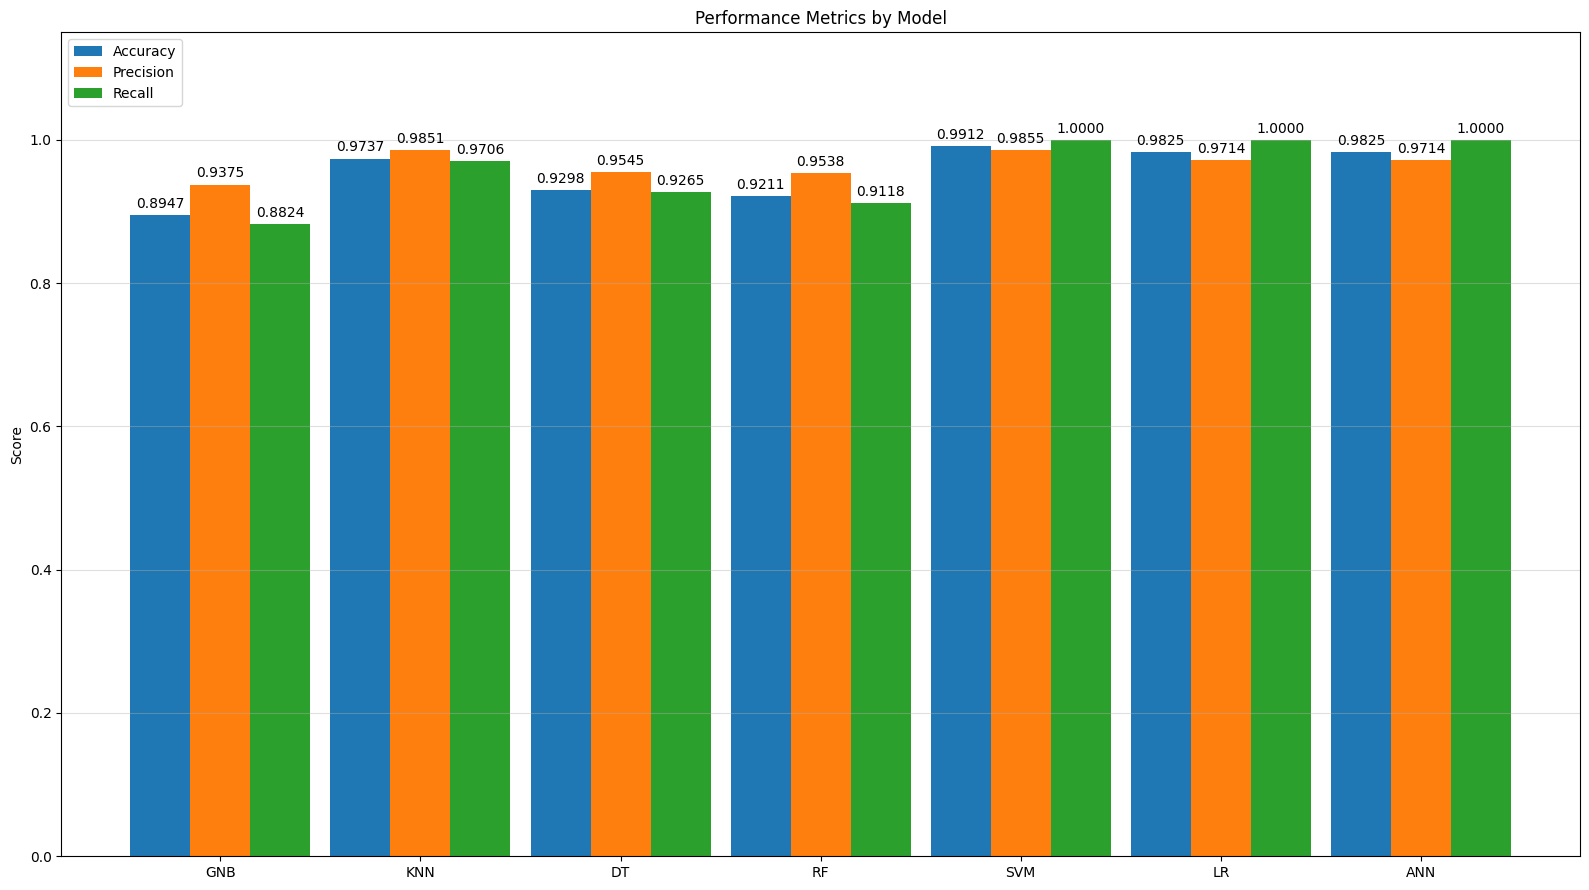

In [398]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for different models
metrics = {
    'Accuracy': [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann],
    'Precision': [precision_gnb, precision_knn, precision_dt, precision_rf, precision_svm, precision_lr, precision_ann],
    'Recall': [recall_gnb, recall_knn, recall_dt, recall_rf, recall_svm, recall_lr, recall_ann]
}

# Model names
title = ['GNB','KNN','DT','RF','SVM','LR','ANN']

# X-axis positions
x = np.arange(len(title))
width = 0.30  # Width of each bar
multiplier = 0  # Used to offset each metric group

# Create figure and axis
fig, ax = plt.subplots(figsize=(16,9))

# Plot each metric as a separate bar group
for attribute, measurement in metrics.items():
    offset = width * multiplier  # Offset each group horizontally
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.4f')  # Display value on top of each bar
    multiplier += 1

# Set axis labels and title
ax.set_ylabel('Score')
ax.set_title('Performance Metrics by Model')

# Set custom X-axis ticks to align with grouped bars
ax.set_xticks(x + width)
ax.set_xticklabels(title)

# Add legend and grid
ax.legend(loc='upper left')
ax.grid(axis='y', alpha=0.4)

# Set Y-axis limit
ax.set_ylim(0, 1.15)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
